Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study a few of the features in detail.

The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

# Spectral centroid
The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:
<div style="display: flex; justify-content: center;">
  <img src="https://miro.medium.com/max/355/1*DkT47WzLrjigT_KVhDoMuQ.png?raw=true" alt="librosa logo" width="300" />
</div>
where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.

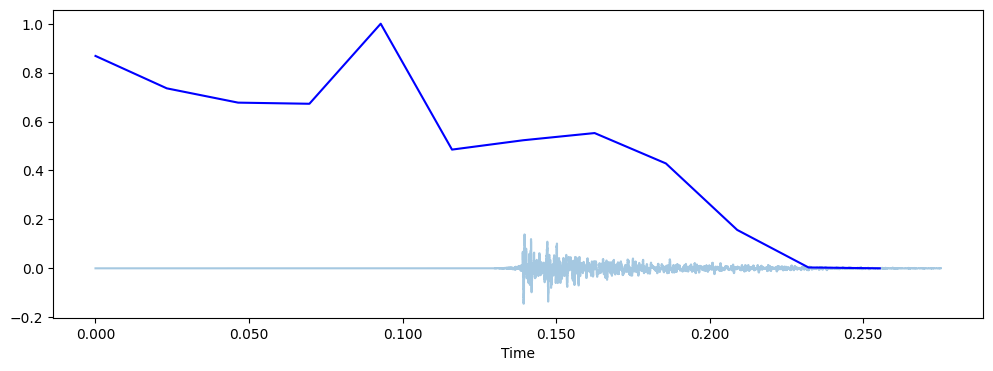

In [2]:
import soundfile as sf
import matplotlib.pyplot as plt
import librosa
from sklearn import preprocessing
x, sr = librosa.load("ping.wav")
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

As we can see, there is a rise in the spectral centroid in the beginning (as the intensity of the signal increases suddenly). Then it decreases as the sound of the signal shrinks.

# Spectral Rolloff

It provides information about the shape of the frequency spectrum of a signal and is used to estimate the cutoff frequency below which a certain percentage of the signal's energy is contained.

The spectral rolloff is typically defined as the frequency below which a certain fraction (often 85% or 95%) of the total spectral energy resides. It represents the point in the frequency spectrum where the higher-energy components transition to lower-energy components.

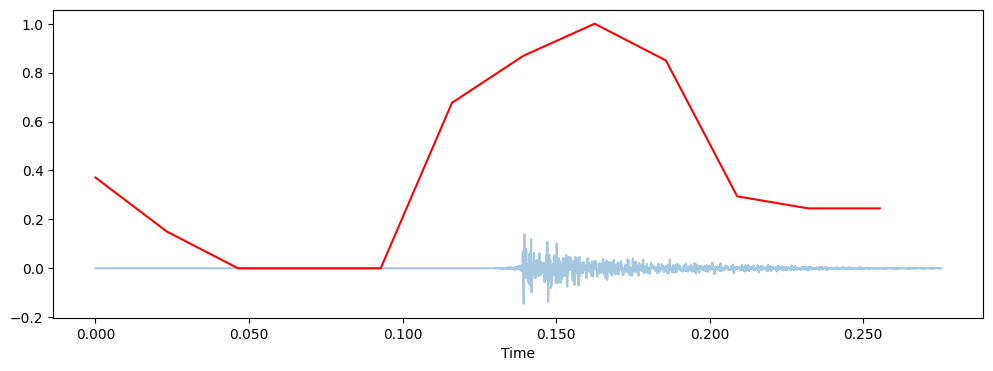

In [7]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

# Spectral Bandwidth


The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.
<div style="display: flex; justify-content: center;">
  <img src="https://miro.medium.com/max/515/1*oUtYY0-j6iEc78Dew3d0uA.png?raw=true" alt="librosa logo" width="300" />
</div>


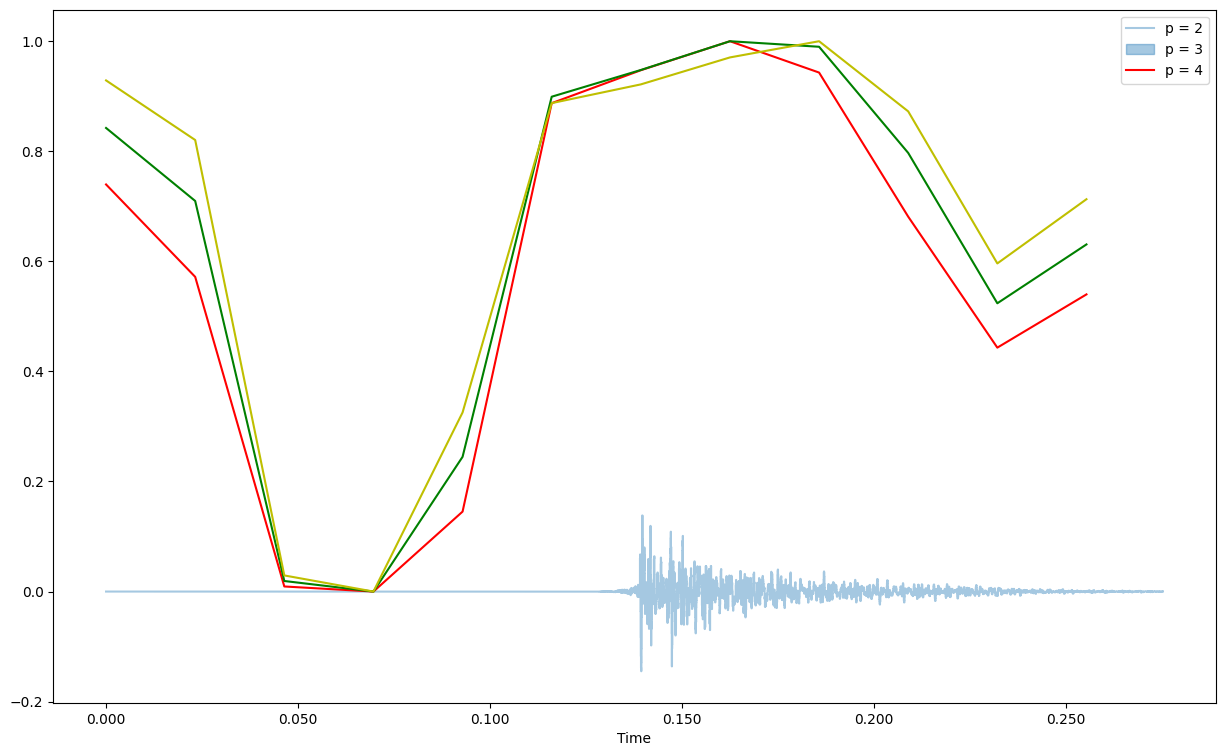

In [11]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr,p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

# Zero-Crossing Rate

A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.

<div style="display: flex; justify-content: center;">
  <img src="https://miro.medium.com/max/887/1*E_XSqizmLNksjknrD8oV2w.png?raw=true" alt="librosa logo" width="500" />
</div>

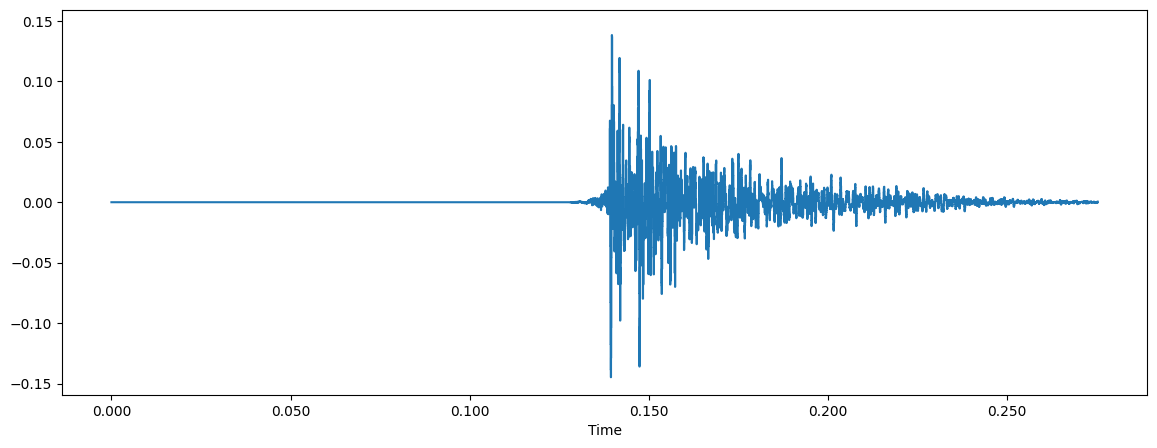

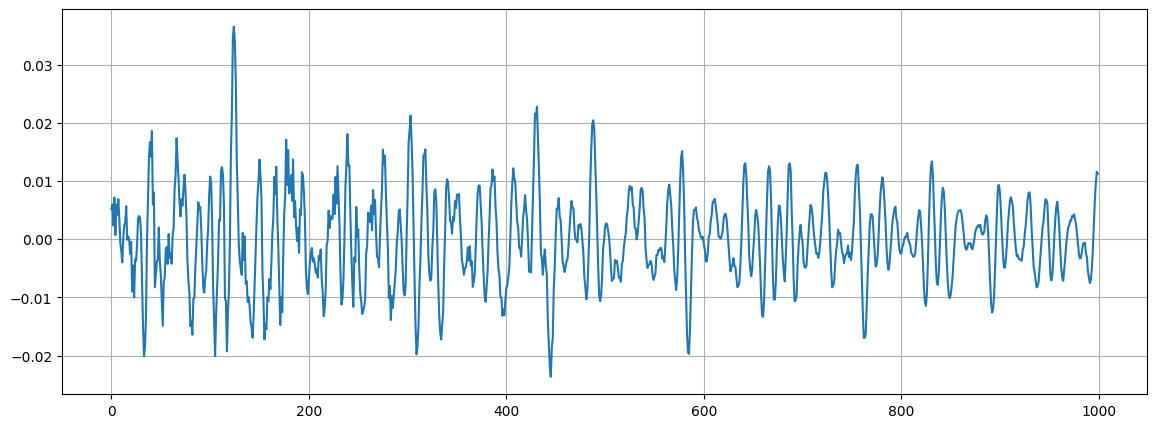

In [23]:
x, sr = librosa.load('ping.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y=x, sr=sr)
# Zooming in
n0 = 4000
n1 = 5000
plt.figure(figsize=(14, 5))
plt.plot(x[4000:5000])
plt.grid()

# Mel-Frequency Cepstral Coefficients(MFCCs)

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

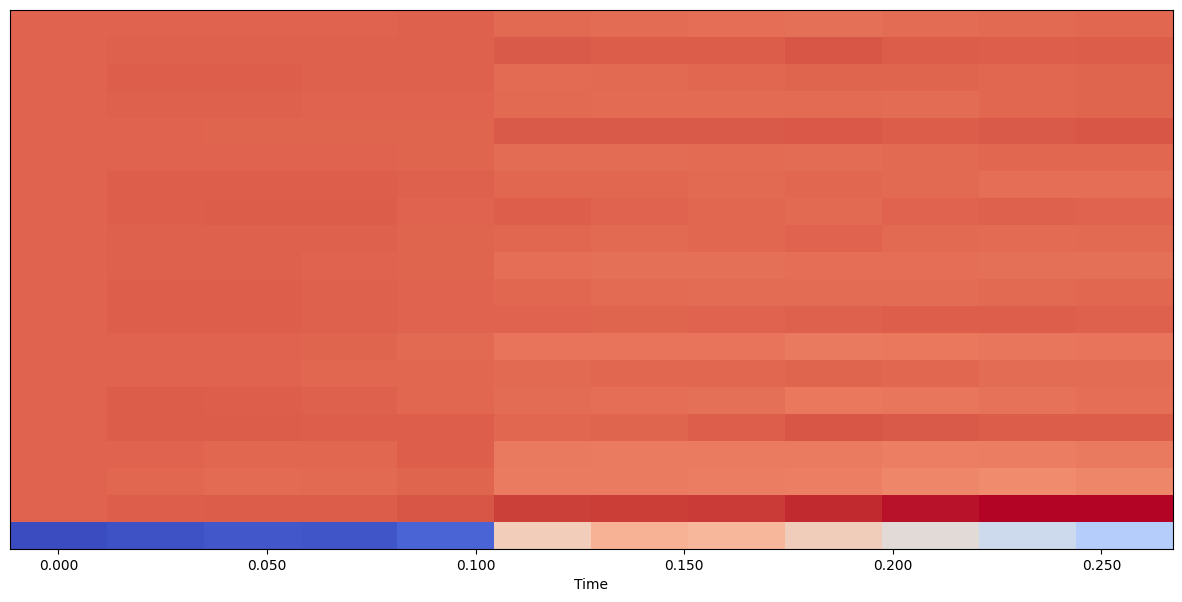

In [25]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# Chroma feature

A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.

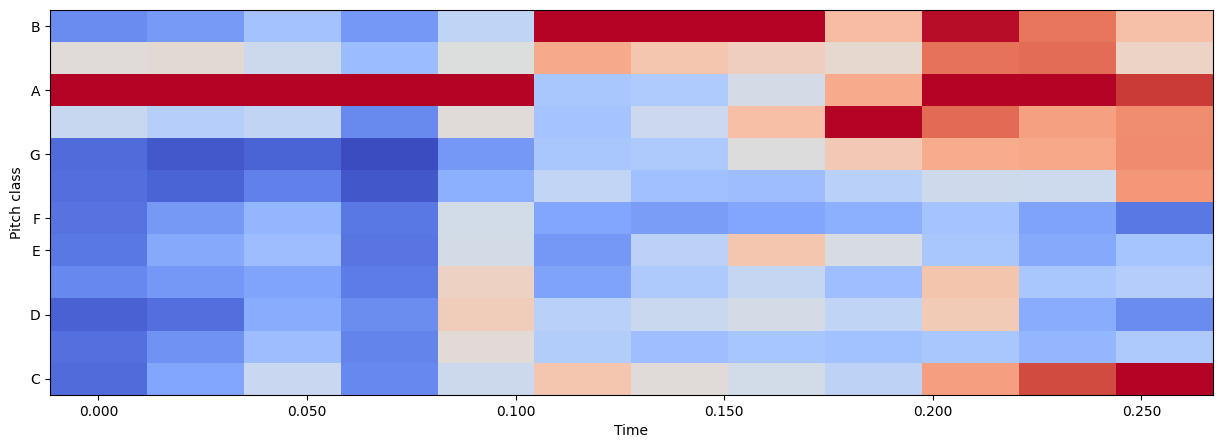

In [30]:
hop_length=512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

As we can see, chroma feature or mfccs can be combined to represent uniquely a sound signal. We can use these feature to compute an algorithm of detecting a sound of reference in an audio file by comparing these features.